<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Statistical_Analysis_Survival_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Survival Analysis

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 11.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=4436d212a85b9ae374b29188188eefa3f4d90f5690c1b3e13dce95a51b88f2af
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [ ]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [ ]:
tc = pd.read_excel('Telecom_Churn.xlsx')
tc.head()

,Sl No.,customerID,genderword,SeniorCitizen,PartnerWord,DependentsW,tenure,PhoneServicew,MultipleLinesw,PaperlessBillingW,...,DeviceProtection_A,TechSupport_A,StreamingTV_A,StreamingMovies_A,InternetService_A,Contract_A,PaymentMethod_A,MonthlyCharges,TotalCharges,Cust_Calls
0,3320,1809-DMJHQ,Female,NO,No,Yes,5,Yes,No,No,...,No,No,No,No,DSL,Month-to-month,Mailed check,46.00,221.70,0
1,5589,3537-RYBHH,Female,YES,Yes,No,47,Yes,Yes,Yes,...,Yes,No,No,No,DSL,Month-to-month,Credit card (automatic),67.45,3252.00,2
2,8170,8630-FJLIB,Female,NO,No,No,18,Yes,No,Yes,...,No,No,No,No,Fiber optic,Month-to-month,Electronic check,69.80,1221.65,1
3,6010,0093-EXYQL,Female,YES,No,No,40,Yes,No,Yes,...,No,No,Yes,Yes,Fiber optic,Month-to-month,Electronic check,91.55,3673.60,2
4,289,4607-CHPCA,Male,NO,Yes,Yes,25,Yes,No,Yes,...,No,No,Yes,Yes,Fiber optic,One year,Electronic check,90.40,2178.60,2


In [ ]:
tc.isnull().sum() #no missing data
tc.dtypes

,0
Sl No.,int64
customerID,object
genderword,object
SeniorCitizen,object
PartnerWord,object
DependentsW,object
tenure,int64
PhoneServicew,object
MultipleLinesw,object
PaperlessBillingW,object


In [ ]:
# Make a copy to avoid touching original
tc["event"] = tc["Churnwords"].map(lambda x: 1 if str(x).strip().lower()=="yes" else 0)

# Tenure as numeric
tc["tenure"] = pd.to_numeric(tc["tenure"], errors="coerce")

# Extract arrays
T = tc["tenure"] # durations
E = tc["event"]  # event: 1=churn, 0=censored

<Axes: xlabel='timeline'>

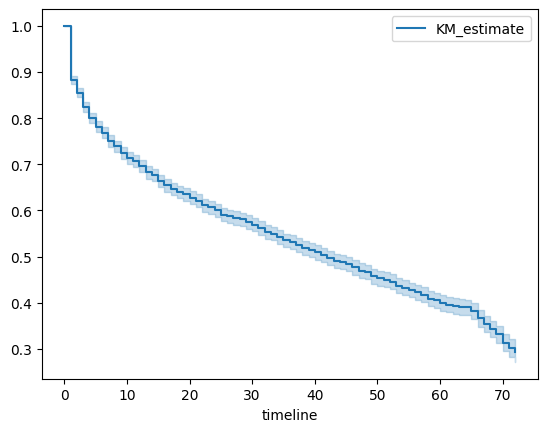

In [ ]:
#fit Kaplan Meier Curve
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

<Figure size 600x800 with 0 Axes>

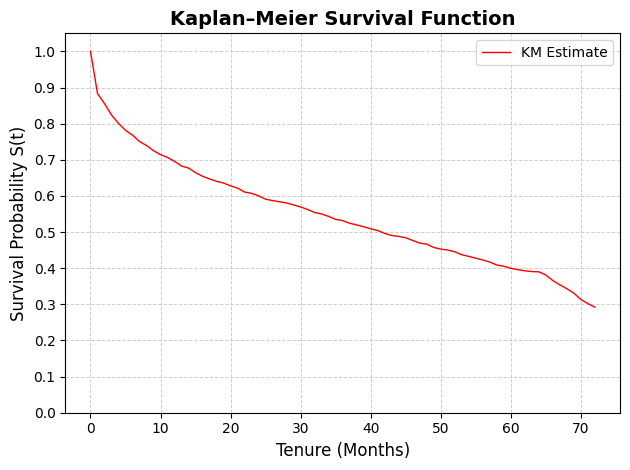

In [ ]:
#Overall survival curve using the Tenure variable

plt.figure(figsize=(6,8))

kmf.survival_function_.plot(
    linewidth=1,
    color="red",
    linestyle="-"
)

plt.title("Kaplan–Meier Survival Function", fontsize=14, fontweight="bold")
plt.xlabel("Tenure (Months)", fontsize=12)
plt.ylabel("Survival Probability S(t)", fontsize=12)

plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1.05)   # keep range nice [0,1]

plt.legend(["KM Estimate"], fontsize=10, loc="upper right")
plt.tight_layout()
plt.show()